Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Mall Customer Segmentation Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [3]:
customer_data=pd.read_csv('Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X=customer_data.drop(columns=['CustomerID','Gender','Age'],axis=1).values

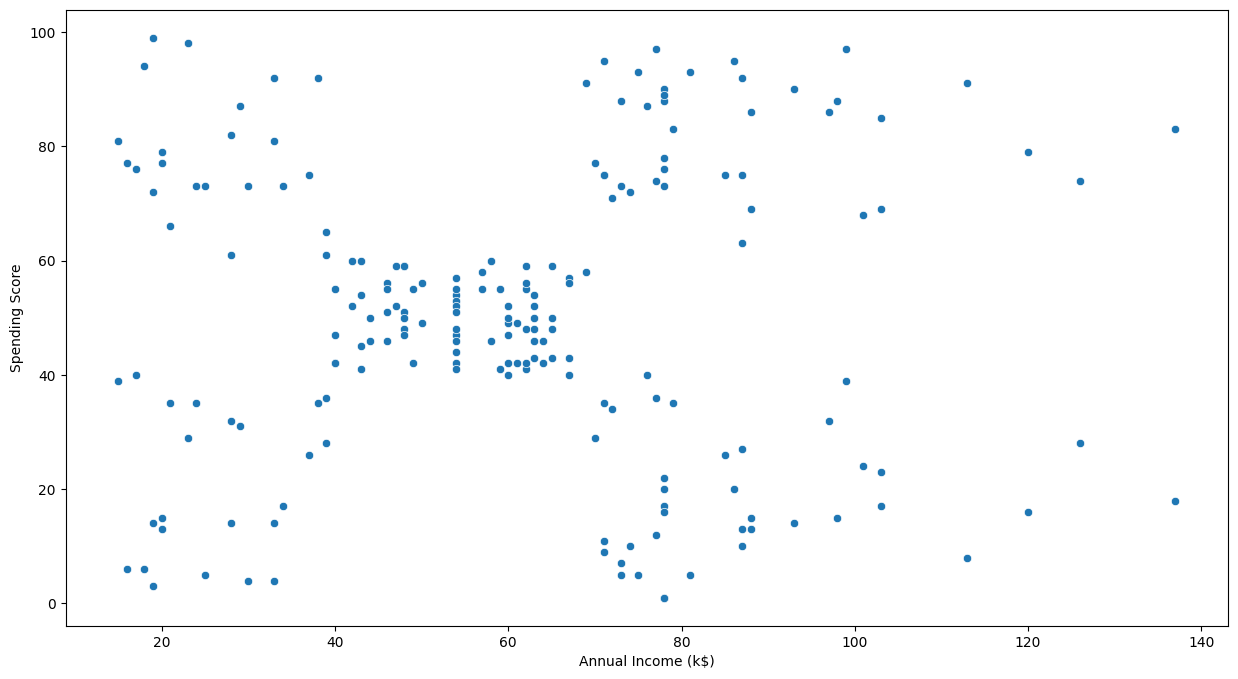

In [8]:
X = customer_data.drop(columns=['CustomerID', 'Gender', 'Age'], axis=1)
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


Training The K-Means algorithm on the training dataset

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

Centroid Points

In [14]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [15]:
kmeansmodel= KMeans(n_clusters= 5, init='k-means++', random_state=0)


In [ ]:
y_kmeans= kmeansmodel.fit_predict(X)

c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


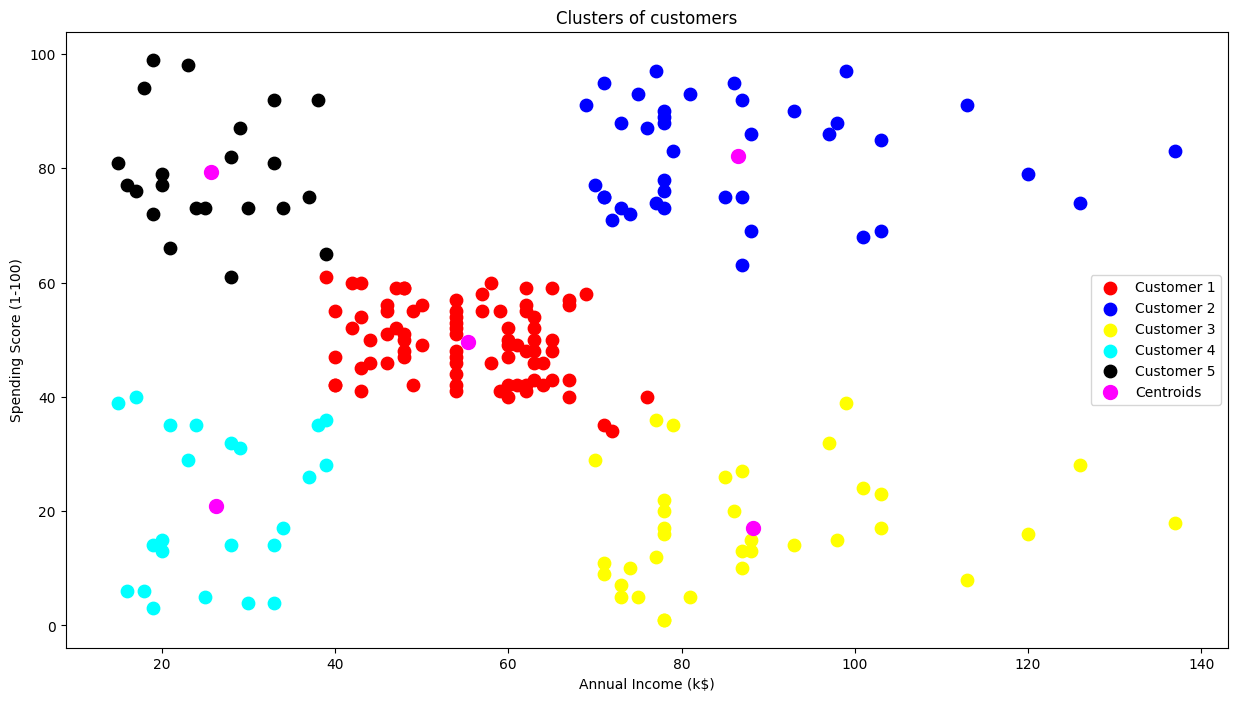

In [18]:
import pandas as pd

# Assuming X is a Pandas DataFrame
customer_data['Cluster'] = kmeansmodel.fit_predict(X)

plt.figure(figsize=(15, 8))

# Plot individual clusters
for cluster_label, color in zip(range(kmeansmodel.n_clusters), ['red', 'blue', 'yellow', 'cyan', 'black']):
    cluster_data = customer_data[customer_data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                s=80, c=color, label=f'Customer {cluster_label + 1}')

# Plot cluster centers
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1],
            s=100, c='magenta', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
